In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib



In [23]:
# root = '/home/ubuntu//code/kernelcnp/experiments/synthetic/results/weakly-periodic-400/models/convGNP/sum-kvv-homo/seed-0/dim-1'
data = 'weakly-periodic-100'
os.chdir('/home/james/code/kernelcnp/experiments/synthetic/results/' + data + '/models/convGNP/sum-kvv-homo/seed-0/dim-1')

In [24]:
basis = ["2", "16", "64", "128", "512"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:red", "tab:green"]
markers = ["o", "x", "s", "v", "D"]
sums = ["1", "2", "8", "16", "32"]


In [25]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(basis, colours):
    for c, marker in zip(sums, markers):          
        experiment_name = os.path.join(f'basis-{m}', 
                                        f'sum-elements-{c}')

        wd = WorkingDirectory(root=experiment_name, print_root=False)
        experiments.append((m, c, colour, marker, wd))
                
# row_labels.append("Oracle-GP")
                
for m in basis:
    for c in sums:
        row_labels.append(f'basis-{m}-sum-{c}')
        

d = "weakly-periodic"
column_labels.append(f'{d}')
column_labels.append(f'{d}-error')
column_labels.append(f'{d}-iterations')
column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

In [26]:
for m, c, colour, marker, wd in experiments:
        try:
            mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                        exists=True))
            print(mean)
            error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                        exists=True))/np.sqrt(2048)
            iterations = np.loadtxt(wd.file('last_epoch.txt', 
                        exists=True))
            num_params = np.loadtxt(wd.file('num_params.txt',
                        exists=True))
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic'] = mean
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-error'] = error
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-iterations'] = int(iterations)
            df.at[f'basis-{m}-sum-{c}', 'weakly-periodic-num-params'] = error
            df.at[f'basis-{m}-sum-{c}', 'marker'] = marker
            df.at[f'basis-{m}-sum-{c}', 'colour'] = colour
            
        except:
            print(wd.root)


0.09495534301613588
0.26823304431669387
0.26304484532078276
0.2655685756012099
0.2613715444839727
0.274854541226232
0.26544169853397764
0.2453506539676164
0.2476812530785537
0.24270802498524746
0.25748014104158756
0.2443415079082115
0.26571791546084567
0.2660283988375886
0.2587636504526381
0.2104683393517553
0.23945904268817686
0.2661982913375869
0.25904006761958953
0.2531124282035671
0.27630394725407315
basis-512/sum-elements-2
basis-512/sum-elements-8
basis-512/sum-elements-16
basis-512/sum-elements-32


In [27]:
os.chdir('/home/james/code/kernelcnp/experiments/synthetic/results/' + data + '/models/Oracle/seed-0/dim-1')
oracle_mean = np.loadtxt('test_nll_mean.txt') 
oracle_error = np.loadtxt('test_nll_error.txt')
oracle_diag_mean = np.loadtxt('test_diag_nll_mean.txt') 
oracle_diag_error = np.loadtxt('test_diag_nll_std.txt')


In [28]:
df

,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,marker,colour
basis-2-sum-1,0.094955,0.000164,101,0.000164,o,tab:blue
basis-2-sum-2,0.268233,0.000099,101,0.000099,x,tab:blue
basis-2-sum-8,0.263045,0.0001,101,0.0001,s,tab:blue
basis-2-sum-16,0.265569,0.000095,101,0.000095,v,tab:blue
basis-2-sum-32,0.261372,0.000098,101,0.000098,D,tab:blue
basis-16-sum-1,0.274855,0.0001,101,0.0001,o,tab:orange
basis-16-sum-2,0.265442,0.000097,101,0.000097,x,tab:orange
basis-16-sum-8,0.245351,0.000094,101,0.000094,s,tab:orange
basis-16-sum-16,0.247681,0.000093,101,0.000093,v,tab:orange
basis-16-sum-32,0.242708,0.000094,101,0.000094,D,tab:orange


In [29]:
def plot_results(d, df, zoom=False):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    
    for i in range(0, len(x)):
        if y[i] is not np.NaN:
           plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_diag_mean * ones, label='Oracle-GP-Diagonal', color='k')
    plt.fill_between(x,
                     (oracle_diag_mean + oracle_diag_error) * ones,
                     (oracle_diag_mean - oracle_diag_error) * ones,
                     color='k', alpha=0.1)
    plt.plot(x, oracle_mean * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_mean + oracle_error) * ones,
                     (oracle_mean - oracle_error) * ones,
                     color='k', alpha=0.1)

    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    
    y_min = np.min(y)
    y_max = np.max(y)
    epsilon = 0.05 * (y_max - y_min)

    if zoom:
        plt.ylim(y_min - epsilon, y_max + epsilon)
    plt.title(d)
    plt.show()

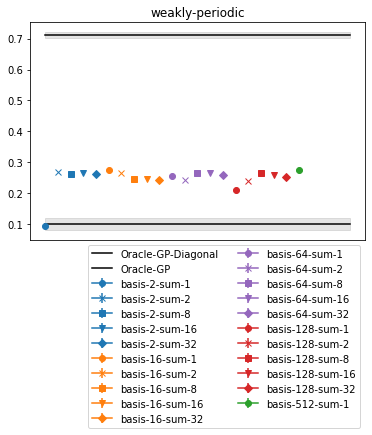

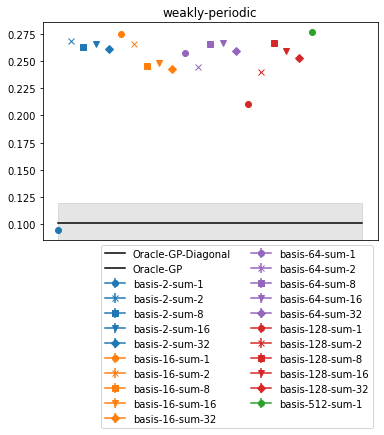

In [30]:
plot_results('weakly-periodic', df)

plot_results('weakly-periodic', df, True)
